# Introduction

> **Will it rain tomorrow?**

That is the question we will try to answer in this project, practicing machine learning.

## Context

A vacation of a group of friends is about to start and they will arrive at the Melbourne Airport tomorrow. They rented a place near the airport and want to save money in the beginning of their trip, so they want to go on foot to the rented place. But, if it is raining, they will have to go there using a mean of transportation. So, they want to know if it is going to rain tomorrow around the Melbourne Airport.

---

### Specific Objective

> **Find if it will tomorrow around the Melbourne Airport.**

# Setup

## Import Libraries

In [1]:
# Import libraries
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Change the number maximum of columns that are displayed

In [2]:
pd.set_option('display.max_columns', 50)

# Import Datasets

In [3]:
# Import the datasets
data = pd.read_csv('data/rain_data_aus.csv')
wind1 = pd.read_csv('data/wind_table_01.csv')
wind2 = pd.read_csv('data/wind_table_02.csv')
wind3 = pd.read_csv('data/wind_table_03.csv')
wind4 = pd.read_csv('data/wind_table_04.csv')
wind5 = pd.read_csv('data/wind_table_05.csv')
wind6 = pd.read_csv('data/wind_table_06.csv')
wind7 = pd.read_csv('data/wind_table_07.csv')
wind8 = pd.read_csv('data/wind_table_08.csv')

The dataset `data`has most the data, while the variable related to the `wind` is separated into 8 different datasets. However, the last two (`wind7` and `wind8`) seems to contain the same data.

In [4]:
# Check if the datasets 'wind7' and 'wind8' are the same
(wind7.shape[0] - wind7.isna().sum()) == np.sum(wind7 == wind8)

date             True
location         True
windgustdir      True
windgustspeed    True
winddir9am       True
winddir3pm       True
windspeed9am     True
windspeed3pm     True
dtype: bool

Therefore, they are the same dataset. So, the `wind8` will not be considered.

In [5]:
# Concatenate the dataframes related to 'wind'
wind = pd.concat(objs=[wind1, wind2, wind3, wind4, wind5, wind6, wind7]).reset_index(drop=True)

# Check the result
wind

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-25,Perth,NaN,NaN,NaN,NaN,NaN,NaN,E,26.0,SE,SE,4.0,11.0
142189,2017-06-25,SalmonGums,NaN,NaN,NaN,NaN,NaN,NaN,SE,15.0,SSE,E,7.0,6.0
142190,2017-06-25,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,SSW,20.0,WNW,SSW,6.0,6.0
142191,2017-06-25,Hobart,NaN,NaN,NaN,NaN,NaN,NaN,NW,50.0,NNW,NNW,17.0,28.0


## Final Raw Dataframe - All Cities

In [6]:
# Merge dataframes 'data' and 'wind'
df = pd.merge(left=data, right=wind, on=['date', 'location'])

# Check the result
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556,NaN,NaN,NaN,NaN,NaN,NaN,E,31.0,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053,NaN,NaN,NaN,NaN,NaN,NaN,E,31.0,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350,NaN,NaN,NaN,NaN,NaN,NaN,NNW,22.0,SE,N,13.0,9.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195,NaN,NaN,NaN,NaN,NaN,NaN,N,37.0,SE,WNW,9.0,9.0


### Create a Backup Dataframe

In [7]:
# Backup
df_bkp = df.copy()

## Final Raw Dataframe - Melbourne Airport

In [8]:
# Filter the dataset
df_ma = df.query('location == "MelbourneAirport"').reset_index(drop=True)

# Check the result
df_ma

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,1.2,Yes,25.880000,46.4,9,6.116945,0.526852,SW,69.0,W,SW,33.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,0.0,No,23.360000,53.6,12,9.775912,0.043212,SSE,56.0,SW,SSE,31.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,0.0,No,2.705801,44.0,12,5.986239,0.011085,SSE,31.0,E,S,13.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,0.0,No,37.040000,29.6,11,9.501362,0.008058,SSE,35.0,NE,SSE,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,0.0,No,36.800000,39.2,15,6.677340,0.020156,SE,33.0,SW,SSE,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2017-06-21,MelbourneAirport,7.7,13.2,0.2,0.6,0.0,97.0,78.0,1029.1,1028.6,7.0,7.0,10.1,11.8,No,0.0,No,17.840000,95.6,12,17.328204,0.178511,NaN,NaN,NaN,NaN,NaN,NaN,N,37.0,W,S,9.0,13.0
3005,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,78.0,60.0,1028.6,1025.0,7.0,7.0,7.4,12.9,No,0.0,No,17.600000,74.0,11,15.581160,0.047633,NaN,NaN,NaN,NaN,NaN,NaN,N,39.0,N,N,17.0,19.0
3006,2017-06-23,MelbourneAirport,5.5,13.2,0.0,1.6,6.0,68.0,66.0,1018.7,1014.0,1.0,7.0,9.6,11.2,No,1.2,Yes,17.840000,81.2,11,-0.692281,0.455975,NaN,NaN,NaN,NaN,NaN,NaN,N,57.0,NNW,N,19.0,35.0
3007,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,80.0,50.0,1018.9,1017.5,2.0,7.0,8.0,11.2,Yes,0.0,No,17.120000,62.0,12,5.295213,0.139375,NaN,NaN,NaN,NaN,NaN,NaN,SW,33.0,W,W,17.0,7.0


Period: 01/01/2009 - 25/06/2017

Number of Days: 3097

Number of Days in the dataset: 3009

Missing Days: 88 (~2.84%)

### Create a Backup Dataframe

In [9]:
df_ma_bkp = df_ma.copy()

## Final Raw Dataframe - Melbourne

In [10]:
# Filter the dataset
df_m = df.query('location == "Melbourne"').reset_index(drop=True)

# Check the result
df_m

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,0.6,No,20.48,47.6,15,14.086571,0.108320,W,63.0,W,W,37.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,1.4,Yes,19.40,64.4,18,5.524671,0.538706,W,63.0,W,WSW,30.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,0.6,No,18.92,71.6,10,12.489827,0.057360,W,39.0,W,W,17.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,0.0,No,19.40,60.8,14,8.586301,0.037736,E,19.0,NNW,N,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,0.0,No,20.60,64.4,5,12.525412,0.010502,N,52.0,N,NNE,24.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,0.2,No,18.20,98.0,11,11.796357,0.298556,NaN,NaN,NaN,NaN,NaN,NaN,NNW,24.0,W,S,2.0,9.0
2431,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,0.0,No,18.92,69.2,18,17.534768,0.025340,NaN,NaN,NaN,NaN,NaN,NaN,N,24.0,NNE,N,9.0,11.0
2432,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,1.4,Yes,19.88,77.6,12,8.856789,0.440801,NaN,NaN,NaN,NaN,NaN,NaN,NNW,44.0,N,N,17.0,19.0
2433,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,0.0,No,16.76,77.6,7,0.724738,0.323773,NaN,NaN,NaN,NaN,NaN,NaN,SW,30.0,WNW,S,11.0,2.0


### Create a Backup Dataframe

In [11]:
df_m_bkp = df_m.copy()

# Data Cleaning and Manipulation

## Metadata

In [12]:
# Check the metadata
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              3009 non-null   object 
 1   location          3009 non-null   object 
 2   mintemp           3009 non-null   float64
 3   maxtemp           3009 non-null   float64
 4   rainfall          3009 non-null   float64
 5   evaporation       3006 non-null   float64
 6   sunshine          3008 non-null   float64
 7   humidity9am       3001 non-null   float64
 8   humidity3pm       3000 non-null   float64
 9   pressure9am       3009 non-null   float64
 10  pressure3pm       3009 non-null   float64
 11  cloud9am          3009 non-null   float64
 12  cloud3pm          3008 non-null   float64
 13  temp9am           3009 non-null   float64
 14  temp3pm           3009 non-null   float64
 15  raintoday         3009 non-null   object 
 16  amountOfRain      3009 non-null   float64


There are **8 categorical variables**:

1. raintoday
2. raintomorrow
3. wind_gustdir
4. wind_dir9am
5. wind_dir3pm
6. windgustdir
7. winddir9am
8. winddir3pm

It seems that the variables related to the wind are repeated or complementary when referring to the same subject.

## Change the data type of the column `date`

## Missing Values

In [13]:
# Variables with most missing values
df_ma.isna().sum().sort_values(ascending=False)/df_ma.shape[0] * 100

wind_dir9am         72.681954
wind_gustspeed      72.482552
wind_gustdir        72.482552
wind_dir3pm         72.416085
wind_speed9am       72.349618
wind_speed3pm       72.316384
winddir9am          28.647391
winddir3pm          28.015952
windgustspeed       28.015952
windgustdir         28.015952
windspeed3pm        27.683616
windspeed9am        27.683616
humidity3pm          0.299103
humidity             0.299103
humidity9am          0.265869
evaporation          0.099701
cloud3pm             0.033234
sunshine             0.033234
location             0.000000
rainfall             0.000000
maxtemp              0.000000
mintemp              0.000000
pressure3pm          0.000000
pressure9am          0.000000
raintomorrow         0.000000
cloud9am             0.000000
temp9am              0.000000
temp3pm              0.000000
raintoday            0.000000
amountOfRain         0.000000
temp                 0.000000
precipitation3pm     0.000000
precipitation9am     0.000000
modelo_vig

The variables that store values measured at 9 AM and 3 PM will not be considered, except for the precipitation.

Therefore, the variables that need to have their missing values filled are:

- humidity
- evaporation
- sunshine

In [41]:
df_ma[df_ma.humidity.isna()]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
402,2010-02-07,MelbourneAirport,12.6,32.6,0.0,5.2,13.0,76.0,NaN,1022.2,1019.0,0.0,1.0,17.5,31.3,No,0.0,No,41.12,NaN,7,1.684210,0.030820,SSE,31.0,NaN,SSE,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
403,2010-02-08,MelbourneAirport,16.0,35.6,0.0,7.2,12.8,NaN,NaN,1020.8,1018.7,1.0,1.0,25.2,34.4,No,0.0,No,44.72,NaN,9,7.617289,0.003600,SSE,44.0,E,S,9.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
404,2010-02-09,MelbourneAirport,16.1,34.6,0.0,10.0,8.8,NaN,NaN,1019.4,1018.1,3.0,7.0,28.0,33.3,No,0.0,No,43.52,NaN,11,4.726479,0.064696,N,54.0,N,SSE,39.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
405,2010-02-10,MelbourneAirport,18.2,34.5,0.0,8.8,3.8,NaN,NaN,1018.7,1016.0,5.0,7.0,22.1,24.1,No,2.6,Yes,43.40,NaN,15,10.370291,0.534849,WNW,59.0,E,N,7.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
406,2010-02-11,MelbourneAirport,18.1,31.3,2.6,3.4,4.5,NaN,NaN,1015.0,1009.4,7.0,7.0,22.4,28.6,Yes,19.8,Yes,39.56,NaN,9,11.967905,0.632988,SW,72.0,WNW,NNE,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
407,2010-02-12,MelbourneAirport,18.1,20.8,19.8,6.8,0.4,NaN,NaN,1011.5,1012.9,8.0,8.0,18.9,18.4,Yes,0.0,No,26.96,NaN,6,-1.305763,0.220949,S,37.0,SW,S,20.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
408,2010-02-13,MelbourneAirport,14.7,20.8,0.0,2.8,0.1,NaN,NaN,1012.2,1010.9,8.0,8.0,17.0,19.5,No,0.2,No,26.96,NaN,6,-1.035390,0.256507,SSW,31.0,SSW,S,11.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
409,2010-02-14,MelbourneAirport,16.3,26.9,0.2,1.6,7.5,NaN,NaN,1009.2,1006.8,7.0,6.0,17.8,26.4,No,0.0,No,34.28,NaN,10,11.517634,0.143202,SSE,43.0,SW,S,15.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1416,2013-01-17,MelbourneAirport,12.3,41.3,0.0,8.0,10.5,48.0,NaN,1008.0,1002.8,6.0,7.0,23.1,39.2,No,0.0,No,51.56,NaN,5,7.235361,0.081377,NaN,NaN,NaN,NaN,NaN,NaN,W,52.0,SE,NW,4.0,28.0


In [26]:
# Check if the 'Melbourne' dataset has the 'humidity' values
df_m[df_m.date.isin(df_ma[df_ma.humidity.isna()].date.values)].loc[:, ['date', 'location', 'humidity']]

,date,location,humidity
586,2010-02-07,Melbourne,50.0
587,2010-02-08,Melbourne,51.2
588,2010-02-09,Melbourne,65.6
589,2010-02-10,Melbourne,62.0
590,2010-02-11,Melbourne,78.8
591,2010-02-12,Melbourne,81.2
592,2010-02-13,Melbourne,93.2
593,2010-02-14,Melbourne,77.6
1471,2013-01-17,Melbourne,15.2


In [40]:
df_ma[df_ma.evaporation.isna()]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
2214,2015-04-23,MelbourneAirport,11.3,17.3,0.0,NaN,1.6,85.0,76.0,1018.7,1013.3,7.0,7.0,14.4,16.7,No,0.2,No,22.76,93.2,7,15.320179,0.590718,NaN,NaN,NaN,NaN,NaN,NaN,S,30.0,S,SSW,15.0,19.0
2461,2015-12-26,MelbourneAirport,11.9,21.2,37.2,NaN,6.2,92.0,41.0,1007.7,1009.4,8.0,5.0,12.0,18.8,Yes,1.2,Yes,27.44,51.2,9,9.189083,0.427752,NaN,NaN,NaN,NaN,NaN,NaN,WSW,67.0,SW,SSW,24.0,31.0
2535,2016-03-09,MelbourneAirport,21.4,30.7,0.0,NaN,0.3,31.0,62.0,1016.6,1017.1,7.0,7.0,27.5,24.4,No,2.4,Yes,38.84,76.4,10,13.403499,0.338527,NaN,NaN,NaN,NaN,NaN,NaN,N,56.0,W,S,33.0,22.0


In [31]:
# Check if the 'Melbourne' dataset has the 'evaporation' values
df_m[df_m.date.isin(df_ma[df_ma.evaporation.isna()].date.values)]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm


In [37]:
df_ma[df_ma.sunshine.isna()]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
642,2010-10-05,MelbourneAirport,11.5,20.2,1.0,4.8,NaN,77.0,57.0,1023.4,1020.7,7.0,4.0,12.7,18.7,No,0.0,No,26.24,70.4,10,11.485908,0.112066,SSE,31.0,SSW,SSW,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Check if the 'Melbourne' dataset has the 'sunshine' values
df_m[df_m.date.isin(df_ma[df_ma.sunshine.isna()].date.values)].loc[:, ['date', 'location', 'sunshine']]

,date,location,sunshine
826,2010-10-05,Melbourne,NaN


## Convert the Categorical Variables to Numbers

### `raintotoday`

In [11]:
# Check the unique values
df_ma.raintoday.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df_ma.raintoday.head()

0     No
1    Yes
2     No
3     No
4     No
Name: raintoday, dtype: object

In [27]:
# Encode this variable
df_ma['raintoday_int'] = df_ma.raintoday.apply(lambda x : 1 if x == 'Yes' else 0)

### `raintotomorrow`

In [14]:
# Check the unique values
df_ma.raintomorrow.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# Encode this variable
df_ma['raintomorrow_int'] = df_ma.raintomorrow.apply(lambda x : 1 if x == 'Yes' else 0)

In [29]:
df_ma

,index,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,raintoday_int,raintomorrow_int
0,62736,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,1.2,...,46.4,9,6.116945,0.526852,SW,69.0,W,SW,33.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,62737,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,0.0,...,53.6,12,9.775912,0.043212,SSE,56.0,SW,SSE,31.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,62738,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,0.0,...,44.0,12,5.986239,0.011085,SSE,31.0,E,S,13.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,62739,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,0.0,...,29.6,11,9.501362,0.008058,SSE,35.0,NE,SSE,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,62740,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,0.0,...,39.2,15,6.677340,0.020156,SE,33.0,SW,SSE,9.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,65740,2017-06-21,MelbourneAirport,7.7,13.2,0.2,0.6,0.0,97.0,78.0,1029.1,1028.6,7.0,7.0,10.1,11.8,No,0.0,...,95.6,12,17.328204,0.178511,NaN,NaN,NaN,NaN,NaN,NaN,N,37.0,W,S,9.0,13.0,0,0
3005,65741,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,78.0,60.0,1028.6,1025.0,7.0,7.0,7.4,12.9,No,0.0,...,74.0,11,15.581160,0.047633,NaN,NaN,NaN,NaN,NaN,NaN,N,39.0,N,N,17.0,19.0,0,0
3006,65742,2017-06-23,MelbourneAirport,5.5,13.2,0.0,1.6,6.0,68.0,66.0,1018.7,1014.0,1.0,7.0,9.6,11.2,No,1.2,...,81.2,11,-0.692281,0.455975,NaN,NaN,NaN,NaN,NaN,NaN,N,57.0,NNW,N,19.0,35.0,0,1
3007,65743,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,80.0,50.0,1018.9,1017.5,2.0,7.0,8.0,11.2,Yes,0.0,...,62.0,12,5.295213,0.139375,NaN,NaN,NaN,NaN,NaN,NaN,SW,33.0,W,W,17.0,7.0,1,0


### Variables related to the wind

In [16]:
# Check the categorical variables related to the wind
df_ma_wind = df_ma[['wind_gustdir', 'windgustdir', 'wind_dir9am', 'winddir9am', 'wind_dir3pm', 'winddir3pm']]
df_ma_wind

,wind_gustdir,windgustdir,wind_dir9am,winddir9am,wind_dir3pm,winddir3pm
0,SW,NaN,W,NaN,SW,NaN
1,SSE,NaN,SW,NaN,SSE,NaN
2,SSE,NaN,E,NaN,S,NaN
3,SSE,NaN,NE,NaN,SSE,NaN
4,SE,NaN,SW,NaN,SSE,NaN
...,...,...,...,...,...,...
3004,NaN,N,NaN,W,NaN,S
3005,NaN,N,NaN,N,NaN,N
3006,NaN,N,NaN,NNW,NaN,N
3007,NaN,SW,NaN,W,NaN,W


In [17]:
# Check if there are missing values for each pair
df_ma_wind[((df_ma_wind.wind_gustdir.isna()) & (df_ma_wind.windgustdir.isna())) | ((df_ma_wind.wind_dir9am.isna()) & (df_ma_wind.winddir9am.isna()) | ((df_ma_wind.wind_dir3pm.isna()) & (df_ma_wind.winddir3pm.isna())))]

,wind_gustdir,windgustdir,wind_dir9am,winddir9am,wind_dir3pm,winddir3pm
90,SSE,NaN,NaN,NaN,SSE,NaN
92,NaN,NaN,N,NaN,SW,NaN
141,N,NaN,NaN,NaN,SE,NaN
142,N,NaN,NaN,NaN,NNE,NaN
153,N,NaN,NaN,NaN,NNE,NaN
...,...,...,...,...,...,...
2860,NaN,NaN,NaN,N,NaN,S
2861,NaN,NaN,NaN,S,NaN,S
2994,NaN,N,NaN,N,NaN,NaN
2996,NaN,N,NaN,NNW,NaN,NaN


In [32]:
df_ma_wind.wind_gustdir == df_ma_wind.windgustdir

0

In [18]:
# Variables with most missing values
df_ma.isna().sum().sort_values(ascending=False)/df_ma.shape[0] * 100

wind_dir9am         72.681954
wind_gustspeed      72.482552
wind_gustdir        72.482552
wind_dir3pm         72.416085
wind_speed9am       72.349618
wind_speed3pm       72.316384
winddir9am          28.647391
winddir3pm          28.015952
windgustspeed       28.015952
windgustdir         28.015952
windspeed3pm        27.683616
windspeed9am        27.683616
humidity             0.299103
humidity3pm          0.299103
humidity9am          0.265869
evaporation          0.099701
sunshine             0.033234
cloud3pm             0.033234
mintemp              0.000000
location             0.000000
maxtemp              0.000000
rainfall             0.000000
pressure9am          0.000000
date                 0.000000
amountOfRain         0.000000
pressure3pm          0.000000
cloud9am             0.000000
temp9am              0.000000
temp3pm              0.000000
raintoday            0.000000
raintomorrow         0.000000
temp                 0.000000
precipitation3pm     0.000000
precipitat

In [20]:
df_ma.describe().T

,count,mean,std,min,25%,50%,75%,max
index,3009.0,64240.000000,868.767806,62736.000000,63488.000000,64240.000000,64992.000000,65744.000000
mintemp,3009.0,9.973945,4.481929,-1.000000,6.700000,9.500000,13.000000,30.500000
maxtemp,3009.0,20.491858,6.653313,8.400000,15.300000,19.100000,24.500000,46.800000
rainfall,3009.0,1.451977,4.592725,0.000000,0.000000,0.000000,0.800000,75.800000
evaporation,3006.0,4.644378,3.337953,0.000000,2.200000,4.000000,6.400000,23.800000
sunshine,3008.0,6.381283,3.920440,0.000000,3.000000,6.500000,9.600000,13.900000
humidity9am,3001.0,70.115961,15.745070,11.000000,61.000000,72.000000,81.000000,100.000000
humidity3pm,3000.0,51.171333,17.831544,7.000000,40.000000,50.000000,62.000000,98.000000
pressure9am,3009.0,1018.087670,7.682523,989.700000,1013.100000,1018.300000,1023.300000,1039.300000
pressure3pm,3009.0,1016.279096,7.531829,988.200000,1011.300000,1016.700000,1021.400000,1036.000000


**Observations**
- mintemp (°C)
  - mínima: -1.000000
  - máxima: 30.500000
- maxtemp (°C)
  - mínima: 8.400000
  - máxima: 46.800000
- temp9am (@ °C)
  - mínima: 3.300000
  - máxima: 35.400000
- temp3pm (@ °C)
  - mínima: 6.200000
  - máxima: 46.100000
- temp (°C)
  - mínima: 2.002276
  - máxima: 58.160000
- humidity (%)
  - mínima: 2.001612
  - máxima: 119.600000 - the percentage cannot be higher than 100%
- precipitation9am (prior to 9am - mm)
  - mínima: -11.023931 - the precipitation cannot be negative
  - máxima: 58.160000  

In [22]:
df_ma.columns

Index(['index', 'date', 'location', 'mintemp', 'maxtemp', 'rainfall',
       'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm',
       'raintoday', 'amountOfRain', 'raintomorrow', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm',
       'wind_speed9am', 'wind_speed3pm', 'windgustdir', 'windgustspeed',
       'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

In [21]:
df_ma[df_ma['precipitation9am'] < 0]

,index,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
86,62822,2009-03-28,MelbourneAirport,8.4,27.3,0.0,4.0,9.6,74.0,20.0,1023.8,1020.8,3.0,1.0,12.2,25.8,No,0.0,No,34.760000,26.000000,9,-2.239116,0.016740,N,26.0,N,SSW,15.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
94,62830,2009-04-05,MelbourneAirport,9.5,20.2,0.0,2.4,4.2,65.0,72.0,1020.3,1018.4,7.0,7.0,14.9,15.8,No,0.0,No,26.240000,88.400000,19,-1.041138,0.229518,SW,54.0,NW,WSW,15.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN
145,62881,2009-05-26,MelbourneAirport,9.9,16.7,5.8,3.0,7.4,81.0,49.0,1021.9,1020.2,4.0,4.0,11.7,16.4,Yes,0.0,No,22.040000,60.800000,7,-4.506292,0.074390,SW,31.0,NNW,SSW,11.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
158,62894,2009-06-08,MelbourneAirport,7.1,15.0,0.8,2.0,2.7,73.0,53.0,1006.7,1005.3,7.0,7.0,10.8,13.4,No,1.2,Yes,20.000000,65.600000,8,-3.708100,0.756518,W,57.0,NNW,NW,26.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
166,62902,2009-06-16,MelbourneAirport,4.7,13.4,0.0,0.8,4.7,100.0,65.0,1024.0,1023.8,8.0,3.0,7.3,12.6,No,0.0,No,18.080000,80.000000,9,-1.485887,0.034303,S,19.0,SW,SSW,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,65574,2017-01-06,MelbourneAirport,16.2,34.4,0.0,8.8,12.2,80.0,32.0,1016.2,1013.1,1.0,1.0,20.9,33.2,No,0.0,No,43.280000,40.400000,10,-0.835543,0.008839,NaN,NaN,NaN,NaN,NaN,NaN,SE,31.0,N,ESE,7.0,17.0
2850,65586,2017-01-18,MelbourneAirport,13.9,21.2,0.4,11.2,10.3,58.0,45.0,1013.7,1015.2,7.0,2.0,16.2,19.7,No,0.0,No,27.440000,56.000000,6,-2.215342,0.063343,NaN,NaN,NaN,NaN,NaN,NaN,S,52.0,SSW,S,28.0,35.0
2906,65642,2017-03-15,MelbourneAirport,19.5,33.9,0.0,10.2,11.3,48.0,29.0,1016.5,1012.1,7.0,7.0,24.4,31.9,No,2.8,Yes,3.083874,36.800000,11,-0.528443,0.037335,NaN,NaN,NaN,NaN,NaN,NaN,N,65.0,N,N,30.0,39.0
2934,65670,2017-04-12,MelbourneAirport,10.5,19.5,0.0,2.8,8.8,85.0,55.0,1026.7,1024.0,7.0,3.0,14.0,18.7,No,0.0,No,25.400000,2.075352,13,-0.771098,0.037014,NaN,NaN,NaN,NaN,NaN,NaN,S,26.0,W,S,7.0,15.0


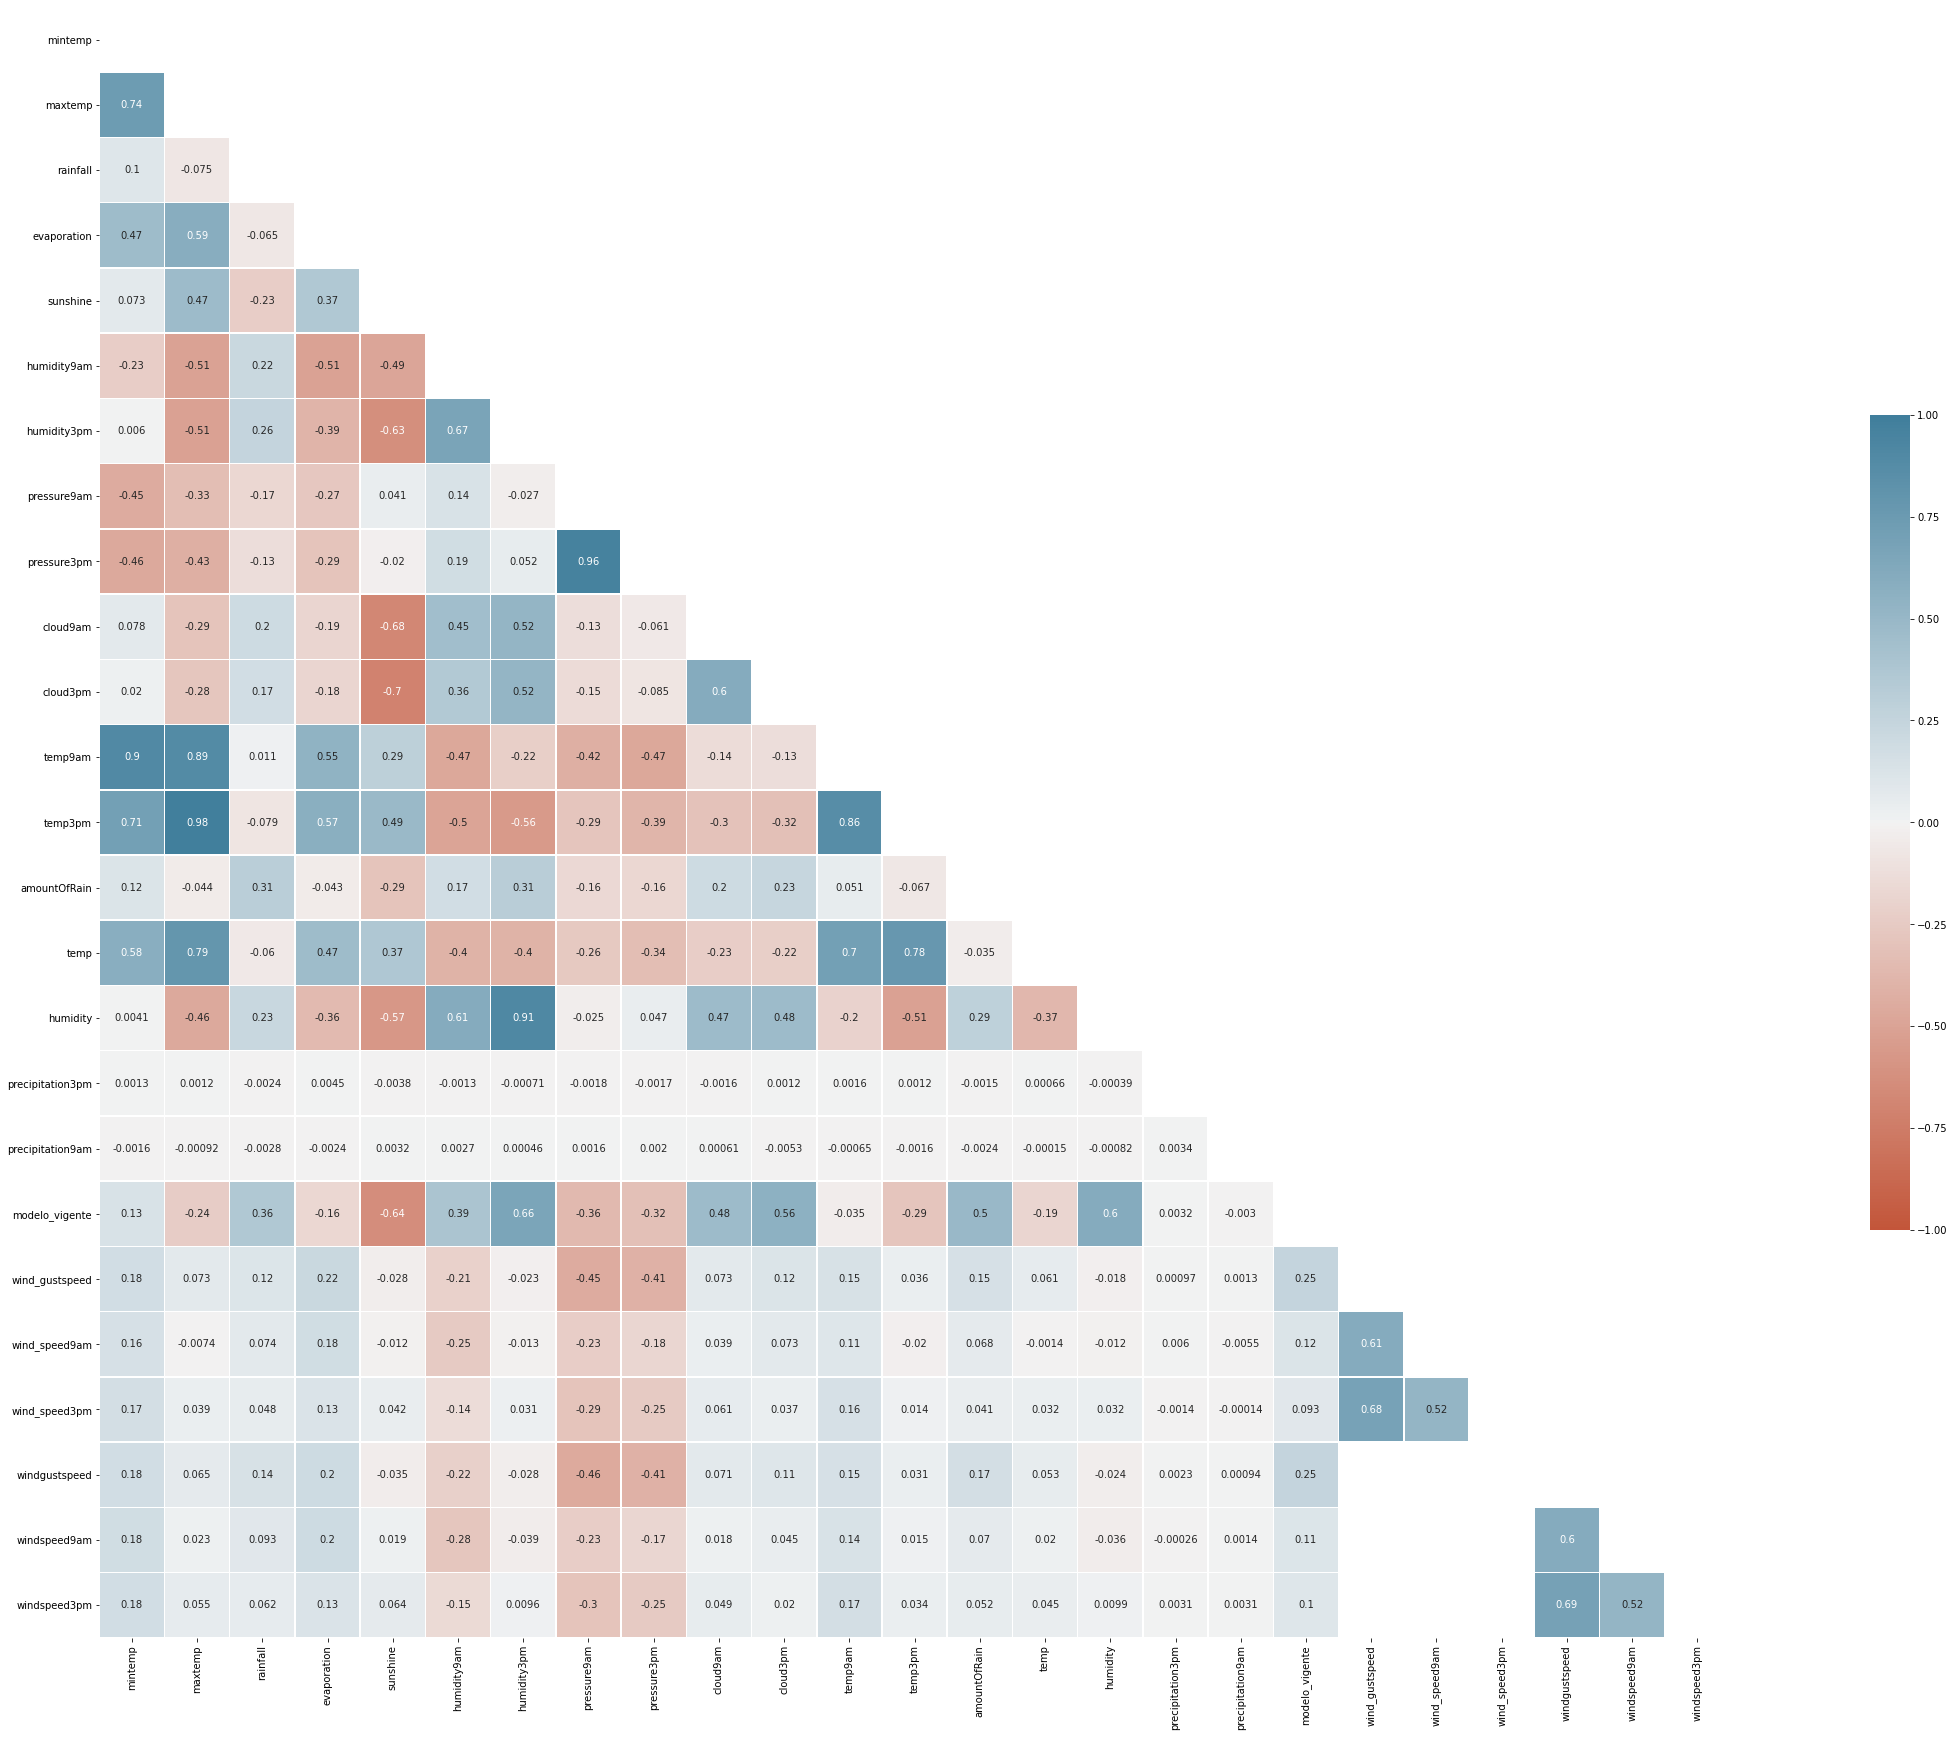

In [29]:
# Check the correlation between the variables

# Correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(50,30))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [30]:
corr

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustspeed,wind_speed9am,wind_speed3pm,windgustspeed,windspeed9am,windspeed3pm
mintemp,1.000000,0.736267,0.104255,0.467261,0.072961,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.584512,0.004145,0.001300,-0.001554,0.134768,0.176832,0.155614,0.167054,0.176663,0.183519,0.177967
maxtemp,0.736267,1.000000,-0.074839,0.588915,0.469967,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,0.794183,-0.463989,0.001191,-0.000918,-0.235871,0.073464,-0.007440,0.039003,0.065224,0.022933,0.054929
rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,-0.059987,0.232724,-0.002410,-0.002792,0.361186,0.116275,0.074033,0.048325,0.140824,0.092524,0.061683
evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,0.465288,-0.355983,0.004543,-0.002419,-0.164926,0.221623,0.180842,0.126181,0.196419,0.199835,0.131137
sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,0.369367,-0.571486,-0.003830,0.003155,-0.639583,-0.028294,-0.011960,0.041941,-0.035196,0.018880,0.063785
humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417,-0.400695,0.606853,-0.001347,0.002721,0.393754,-0.210092,-0.253841,-0.139347,-0.217641,-0.277318,-0.148689
humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183,-0.404326,0.908871,-0.000707,0.000464,0.662753,-0.022779,-0.013315,0.030976,-0.028441,-0.038938,0.009564
pressure9am,-0.451260,-0.332293,-0.168085,-0.269907,0.040959,0.139519,-0.027449,1.000000,0.961348,-0.130081,-0.148139,-0.422773,-0.287301,-0.163673,-0.261068,-0.025464,-0.001760,0.001572,-0.361402,-0.450698,-0.229463,-0.291908,-0.460774,-0.227792,-0.296668
pressure3pm,-0.461623,-0.427279,-0.126728,-0.293160,-0.020464,0.186955,0.051840,0.961348,1.000000,-0.061152,-0.084963,-0.470325,-0.389863,-0.164184,-0.335831,0.046812,-0.001651,0.001973,-0.316223,-0.411525,-0.177186,-0.254147,-0.413394,-0.174307,-0.254912
cloud9am,0.077625,-0.289865,0.198195,-0.185032,-0.675610,0.452182,0.517037,-0.130081,-0.061152,1.000000,0.604118,-0.137843,-0.302520,0.198095,-0.227987,0.469853,-0.001553,0.000611,0.475929,0.072921,0.038558,0.060809,0.070950,0.018163,0.049363


In [ ]:
sns.pairplot(df[['mintemp', 'maxtemp', 'temp', 'evaporation', 'sunshine', 'humidity9am', 'humidity', 'humidity3pm', 'rainfall', 'amountOfRain', 'precipitation3pm', 'precipitation9am']])

In [ ]:
sns.pairplot(df[['mintemp', 'maxtemp', 'temp', 'evaporation', 'rainfall', 'amountOfRain', 'precipitation3pm', 'precipitation9am']])

## Holdout -  Cross Validation

# Baseline

The Logistical Regression will be used in the baseline, since it is a simple model.

## Import the library

In [27]:
# Import libraries

from sklearn.linear_model import LogisticRegression

In [28]:
# Instance the model
baseline_model = LogisticRegression()

# Train the model

# Exploratory Data Analysis

# Modelo